In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import solve_ivp
import sys
import importlib

from Broth_model import *
from Plaque_model import *
from Swimming_model import *
from Initial_values import *
from Plotters import *
importlib.reload(sys.modules["Plaque_model"])
#importlib.reload(sys.modules["Plotters"])

<module 'Plaque_model' from '/Users/dhm160/Documents/GitHub/Masters-thesis/Plaque_model.py'>

# Figure 1

## A

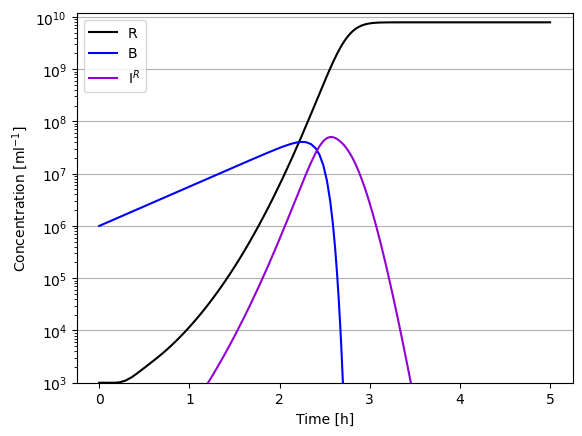

In [2]:
#Fetch default parameter values 
V = DV() 
model = "M0"

#Option to change parameter values (see Initial_values.py)
#V.f_tau = 10 #Example

#Fetch initial values 
y0 = IV(model)

#Set simulation length (mins)
t = 15*V.tau0

#Run simulation
M0sol = solve_ivp(M0,[0,t],y0,args = Const(V,model))

#Plot
BrothPlotter(model,V,M0sol.t,M0sol.y, scale = "log",figtitle = model,plotn = False)

## B

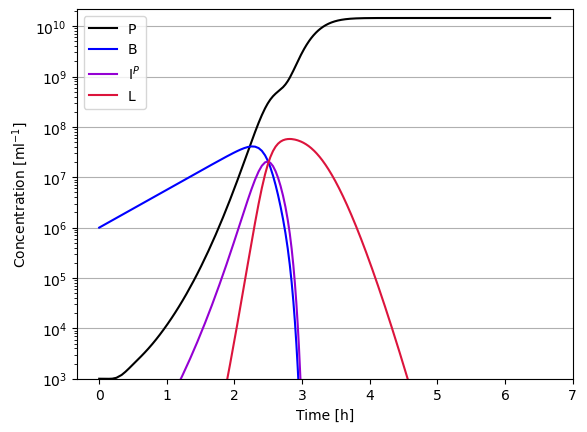

In [3]:
#Fetch default parameter values 
V = DV() 

#Option to change parameter values (see Initial_values.py)
#V.f_tau = 10

#Fetch initial values 
y0 = IV("M1")

#Set simulation length (mins)
t = 20*V.tau0

#Run simulation
M1sol = solve_ivp(M1,[0,t],y0,args = Const(V,"M1"))

#Plot
BrothPlotter("M1",V,M1sol.t,M1sol.y, scale = "log",figtitle = "M1",plotn=False)

# Fig 2

## A

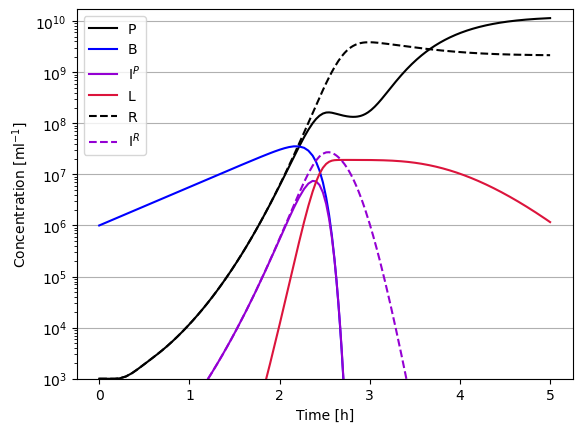

In [7]:
#Competition between wild type and r-mutant

V2 = DV() #Default values
V2.comp = 1 #Competition version
V2.f_beta, V2.f_tau = 5,5

#Intial values
y0 = IV("M1",comp = V2.comp)

#Simulation length (mins)
t = 5*60 

M1Csol = solve_ivp(M1,[0,t],y0,args = Const(V2,"M1"))
BrothPlotter("M1",V2,M1Csol.t,M1Csol.y,figtitle = "M1C",plotn = False)
#plt.ylim(1e3,5e10)

# Fig 3

## A

In [2]:
#r-mutant plaque

VP              = DVS(Rmax = 2*10**3,dr = 20) #Default values
y0              = IVS("MP0",VP) #Intial values
t               = 5*60 #Simulation time
simP,savetimes  = MPShell("MP0",y0,VP,t)

100%|██████████| 112500/112500 [00:04<00:00, 25149.41it/s]


In [5]:
GifGenerator(simP,savetimes,VP,"MP0",f"MP0",ylim = (0.001,20),legendloc = "upper right",Btot = True)

TypeError: GifGenerator() missing 1 required positional argument: 'T'

In [ ]:
# Kode fra den oprindelige parameterscan

#import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib as mpl
#from tqdm import tqdm
#import sys
#sys.path.insert(-1,"/nbi/nbicmplx/cell/dhm160/Masters-thesis/")
#from Plaque_model import *
#from Initial_values import *
#from Plotters import *
#
#size = 19
#ftarr = np.linspace(1,10,size)
#fbarr = np.linspace(1,10,size)
#
#ZOIarr = np.empty((size,size))
#sizearr = np.empty((size,size))
#
#V = DVS(Rmax = 1.5*10**3)
#y0 = IVS("MP1",V)
#t = 6*60
#
#for it,ft in enumerate(ftarr):
#    print(f"Progress = {it/size}")
#    V.f_tau = ft
#    for ib,fb in enumerate(fbarr):
#        V.f_beta = fb
#        sim = MPShell("MP1",y0,V,t)
#        ZOIarr[it,ib] = rhalf(sim,LIN = True,V=V,var = "B")[-1]
#        sizearr[it,ib] = rhalf(sim,LIN = True,V=V,var = "Btot")[-1]

#np.savetxt("MP1ZOI.csv", ZOIarr, delimiter=",")
#np.savetxt("MP1plaquesize.csv", sizearr, delimiter=",")

In [12]:
lastframe   = simP[-1]
Btot        = np.sum(lastframe[:11], axis = 0)
B           = lastframe[0]
rhalf       = (np.where(Btot >= Btot[-1]/2)[0][0])*VP.dr
rZOI        = (np.where(B > B[-1]/2)[0][0])*VP.dr
rhalf,rZOI

(1192, 1306)

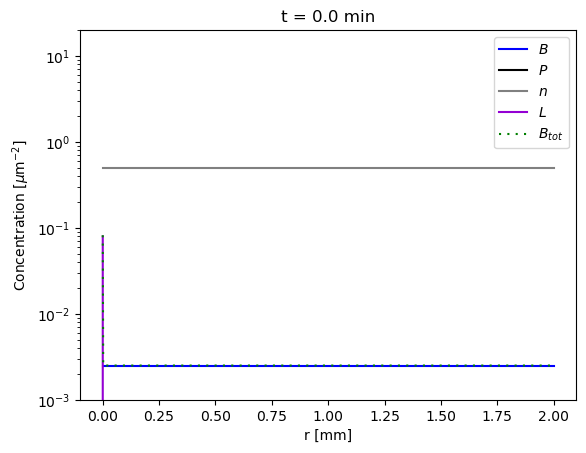

In [13]:
GifGenerator(simP,VP,t,"MP0",f"MP0",ylim = (0.001,20),legendloc = "upper right",Btot = True)

In [9]:
#Wild type plaque

VP2         = DVS(Rmax = 2*10**3,dr = 2)
VP2.f_beta  = 4
VP2.f_tau   = 1
y0          = IVS("MP1",VP2)
t           = 5*60
simP2       = MPShell("MP1",y0,VP2,t)

100%|██████████| 11249999/11249999 [25:38<00:00, 7314.15it/s]


In [14]:
lastframe2  = simP2[-1]
Btot2       = np.sum(lastframe2[:21], axis = 0)
B2          = lastframe2[0]
rhalf2      = (np.where(Btot2 >= Btot2[-1]/2)[0][0])*VP2.dr #Convert to mm
rZOI2       = (np.where(B2 > B2[-1]/2)[0][0])*VP2.dr #Convert to mm
rhalf2/rhalf,rZOI2/rZOI

(0.9697986577181208, 0.9908116385911179)

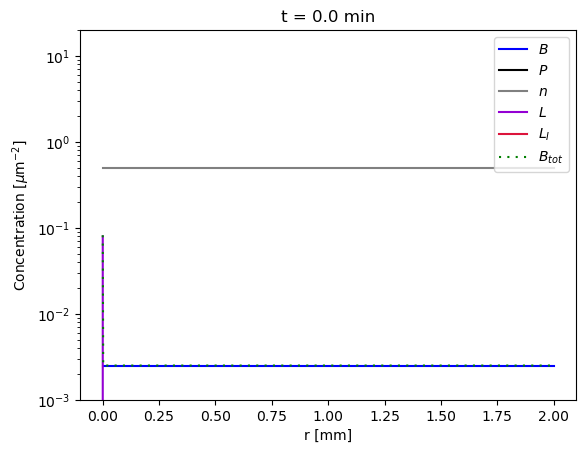

In [15]:
GifGenerator(simP2,VP2,t,"MP1",f"MP1",ylim = (0.001,20),legendloc = "upper right",Btot = True)

# Swimming model

In [32]:
#r-mutant swimming plate

#Set parameters
rho = 4*1e6 #Richness of the swimming medium - has a large effect on the simulation outcome
VS = DVS(dr = 20,rho = rho,Rmax = 40*10**3)

#Default values
y0 = IVS("MS0",VS)

#Start simulation
t = 20*60
simS = MSShell("MS0",y0,VS,t)

100%|██████████| 450000/450000 [13:27<00:00, 557.58it/s]


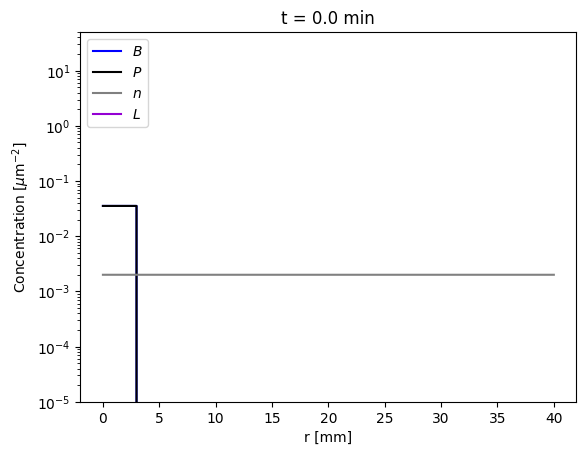

In [33]:
GifGenerator(simS,VS,t,"MS0",name = "MS0",ylim = (1e-5,50))

In [36]:
#Wild-type swimming plate

#Set parameters
rho = 4*1e6
VS2 = DVS(dr = 20,rho = rho,Rmax = 40*10**3)

#Default values
y0 = IVS("MS1",VS2)

#Start
t = 20*60
simS2 = MSShell("MS1",y0,VS2,t)

100%|██████████| 450000/450000 [20:52<00:00, 359.17it/s]


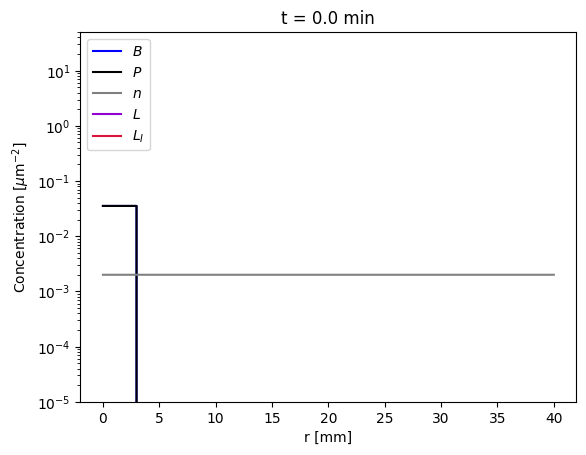

In [37]:
GifGenerator(simS2,VS2,t,"MS1",name = "MS1",ylim = (1e-5,50))